### Olof Sjögren
### Romain Theodet

# Question 1
## a)

The data was retrieved from: 
https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita

The plot is using the data for the year 2018 and rows containing missing values have been filtered out. The final amount of rows (countries) was 167. Compared to the 195 countries in the world we conclude the table is a reasonable representation.

GDP per capita is measured in 2011 international dollars, which corrects for inflation and cross-country price differences.

NOTE: The axis denoting GDP is plot logarithmic using base 10 to account for a minority of countries with extremly high GDP, thus making the graph hard to read as a lot of the other scatter points blend together.

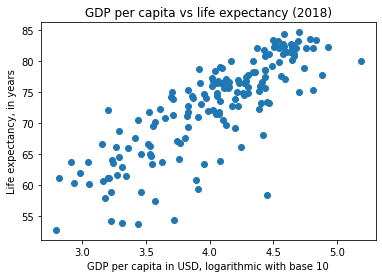

In [119]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

entityCol = "Entity"
yearCol = "Year"
populationCol = "Population (historical estimates)"
lifeCol = "Life expectancy"
GDPCol = "GDP per capita"

table = pd.read_csv("./life-expectancy-vs-gdp-per-capita.csv")
table = table[[entityCol, yearCol, populationCol, lifeCol, GDPCol]]

# 306 "countries" at first : this include micronations, continents and other edge-cases

# Only select rows for the year 2018
is2018 = table[yearCol] == 2018
table = table[is2018]

# Remove all rows with 'nan' values, i.e. inclomplete rows
table = table.dropna()

# We can also remove the year column since we know all are for year 2018.
# We also delete the entry for the world as it is not a country.
del table[yearCol]
table = table.set_index(entityCol)
table = table.drop("World")

table[GDPCol] = np.log10(table[GDPCol])

# len(table) == 167
# There are 195 countries in the world, so while we dropped some,
# we still keep around 85% of the world

xValues = table[GDPCol]
yValues = table[lifeCol]
plt.title("GDP per capita vs life expectancy (2018)")
plt.xlabel("GDP per capita in USD, logarithmic with base 10")
plt.ylabel("Life expectancy, in years")
plt.scatter(xValues, yValues)
plt.show()


## b)
The results you can see above seems reasonable.
We can see that the GDP of each country seems correlated to its life expectancy.

A logical explaination is that people in poor countries don't live as long as in rich countries, because of political instabilities, food and water shortage, and access to healthcare. 

## c)

We did a data cleaning, as some countries were missing some informations. It probably also helped us remove data points which aren't actually countries such as continents and small city-states, since the original dataset counted 306 entities. 

We also only kept the year 2018,to keep the plot more clear and have the same temporal references.

The columns we kept are `Entity` (the country name), `Year`, `Life expectancy` and `GDP per capita`. We removed excess columns such as `Country Code` and `Continent`.

## d)
The calculated table below shows the countries with a life expectancy higher than one standard deviation above the mean.

In [120]:
deviationLife = np.std(table[lifeCol])
meanLife = np.mean(table[lifeCol])
deviationGDP = np.std(table[GDPCol])
meanGDP = np.mean(table[GDPCol])

rowsAbove = table[ table[lifeCol] > meanLife + deviationLife ]
del rowsAbove[populationCol]

print("Countries with a life expectancy higher than one standard deviation above the mean :")
rowsAbove

Countries with a life expectancy higher than one standard deviation above the mean :


,Life expectancy,GDP per capita
Entity,,
Australia,83.281,4.697498
Austria,81.434,4.633348
Belgium,81.468,4.599405
Canada,82.315,4.651944
Cyprus,80.828,4.434320
Denmark,80.784,4.665697
Finland,81.736,4.589913
France,82.541,4.585640
Germany,81.180,4.664432


## e)
The result is based on the assumption that a high life expectancy is any life expectancy higher than average, plus a small bias, which is a quarter of a standard deviation.
Subsequently a low GDP per capita is any GDP per capita lower than average, minus a bias.

The table below shows countries with a high life expectancy and a low GDP per capita.

In [121]:
rowsBelowAverage = table[ (table[lifeCol] > meanLife + deviationLife / 4) & (table[GDPCol] < meanGDP - deviationGDP / 4) ]
del rowsBelowAverage[populationCol]

print("Countries with a high life expectancy but a low GDP per capita :")
rowsBelowAverage


Countries with a high life expectancy but a low GDP per capita :


,Life expectancy,GDP per capita
Entity,,
Honduras,75.088,3.702571
Vietnam,75.317,3.833411


## f)
We consider a strong economy to be a country with a total GDP higher than one standard deviation above the mean.
We are searching for any of these countries which have a lower than average life expectancy.

The bias is higher than above (a full standard deviation), since an "above-average" country shouldn't count as a rich country.

In [123]:
deviationTotalGDP = np.std(table[GDPCol] * table[populationCol])
meanTotalGDP = np.mean(table[GDPCol] * table[populationCol])
rowsBelowAverage = table[ (table[lifeCol] < meanLife) & (table[GDPCol] * table[populationCol] > meanTotalGDP + deviationTotalGDP) ]

print("Countries with a low life expectancy but a high total GDP :")
rowsBelowAverage

Countries with a low life expectancy but a high total GDP :


,Population (historical estimates),Life expectancy,GDP per capita
Entity,,,
India,1.352642e+09,69.416,3.832924
Indonesia,2.676705e+08,71.509,4.073782


## g)

We used the same formula as above, but with a GDP per capita instead of the total GDP.
The table below shows the countries fulfilling this criteria.

As we can there are no countries in the result.

We can say that there are some countries which are cumulatively rich with a high total GDP, a high population but with a comperatively low life expectancy. If one instead considers the GDP per capita these countries aren't really rich anymore. This might indicate that all countries with a high GDP per capita also has a higher life expectancy. One could thus assume a connection between a higher GDP per capita and a higher life expectancy, but the connection does not exist when considering the total GDP of a country instead.

In [124]:
rowsBelowAverage = table[ (table[lifeCol] < meanLife) & (table[GDPCol] > meanGDP + deviationGDP) ]

print("Countries with a low life expectancy but a high GDP per capita :")
rowsBelowAverage

Countries with a low life expectancy but a high GDP per capita :


,Population (historical estimates),Life expectancy,GDP per capita
Entity,,,


# Question 2

## a)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab83f1d1-4f39-4251-b899-1ad25d544179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>